In [5]:
!git clone https://github.com/ultralytics/yolov3  # clone
%cd yolov3
%pip install -qr requirements.txt  # install

import torch
from yolov3 import utils
display = utils.notebook_init()  # checks

YOLOv3 🚀 v9.6.0-6-g0f80f2f torch 1.10.0+cu111 CPU


Setup complete ✅


In [6]:
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 14.02 MiB | 18.40 MiB/s, done.
Resolving deltas: 100% (10353/10353), done.


In [7]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile
!sed -i 's/LIBSO=0/LIBSO=1/' Makefile

/content/yolov3/darknet


detect: weights=['yolov3.pt'], source=data/images, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv3 🚀 v9.6.0-6-g0f80f2f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
image 1/2 /content/yolov3/data/images/bus.jpg: 640x480 4 persons, 1 bus, 2 ties, Done. (2.269s)
image 2/2 /content/yolov3/data/images/zidane.jpg: 384x640 2 persons, 3 ties, Done. (3.171s)
Speed: 2.8ms pre-process, 2719.9ms inference, 1.7ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp3


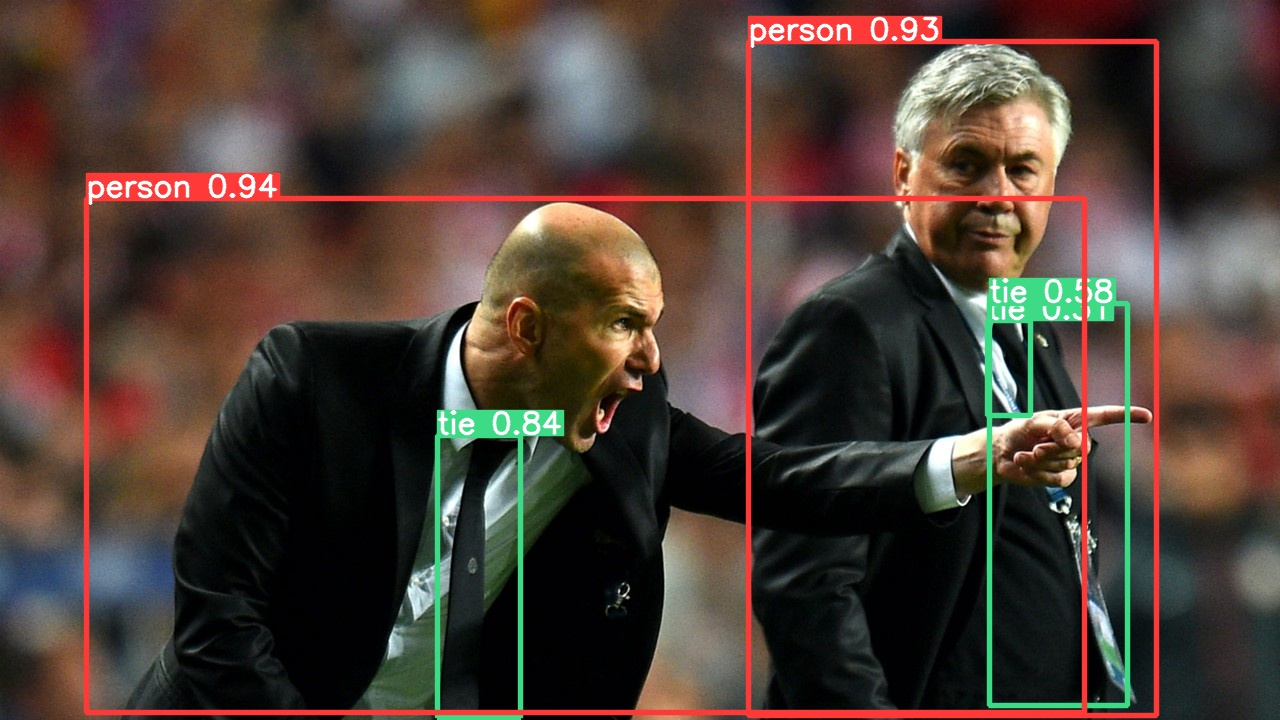

In [6]:
!python detect.py --weights yolov3.pt --img 640 --conf 0.25 --source data/images
display.Image(filename='runs/detect/exp/zidane.jpg', width=600)

In [7]:
torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')
!unzip -q tmp.zip -d ../datasets && rm tmp.zip

  0%|          | 0.00/780M [00:00<?, ?B/s]

In [8]:
!python val.py --weights yolov3.pt --data coco.yaml --img 640 --iou 0.65 --half

val: data=/content/yolov3/data/coco.yaml, weights=['yolov3.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.65, task=val, device=, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=True, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv3 🚀 v9.6.0-6-g0f80f2f torch 1.10.0+cu111 CPU

Fusing layers... 
Model Summary: 261 layers, 61922845 parameters, 0 gradients, 156.1 GFLOPs
val: Scanning '../datasets/coco/val2017' images and labels...4952 found, 48 missing, 0 empty, 0 corrupted: 100% 5000/5000 [00:02<00:00, 2219.15it/s]
val: New cache created: ../datasets/coco/val2017.cache
               Class     Images     Labels          P          R     mAP@.5 mAP@.5:.95:   2% 3/157 [02:57<2:31:47, 59.14s/it]
Traceback (most recent call last):
  File "val.py", line 367, in <module>
    main(opt)
  File "val.py", line 340, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.7/dist-packages/torch/autog